In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.rc("font", family = "Gulim")
plt.rc("axes", unicode_minus = False)

In [144]:
df_iris = sns.load_dataset("iris")
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [145]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [146]:
X = df_iris.iloc[:, :-1]
y = df_iris["species"]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [148]:
ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

# print(ss.mean_)
# print(ss.scale_)

# fit_transform을 사용하면 fit과 transform을 동시에 진행하는 것.
# 하지만 test data에도 정규화를 진행하여야 하기 때문에 fit_transform을 사용하지 않고, fit 진행 후 transform을 진행
# mean_, scale_의 파라미터를 받아오기 위해서
# StandardScaler()는 표준 정규화, 단위를 없앨때 주로 사용

In [149]:
knn = KNeighborsClassifier()

knn.fit(train_scaled, y_train)
print("Train acc = {:.4f}".format(knn.score(train_scaled, y_train)))
print("Test acc = {:.4f}".format(knn.score(test_scaled, y_test)))

Train acc = 0.9714
Test acc = 0.9556


In [150]:
## Attribute
print("classes = ", knn.classes_)
# print("feature names = ", knn.feature_names_in_)
print("metric = ", knn.effective_metric_)
print("sample = ", knn.n_samples_fit_)
print("n neighbors = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
metric =  euclidean
sample =  105
n neighbors =  5


In [179]:
df_wine = pd.read_csv('https://bit.ly/wine-date')
df_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [263]:
def summarize_dataframe(df):
    """
    데이터프레임의 다양한 정보를 출력하고, 이상치 확인을 위한 boxplot을 그리는 함수.
    
    Parameters:
    df (pd.DataFrame): 요약하려는 데이터프레임
    
    Returns:
    None
    """
    print("====== DataFrame Shape ======")
    print(f"Shape: {df.shape}")  # 데이터프레임의 크기
    
    print("\n====== DataFrame Columns ======")
    print(f"Columns: {df.columns.tolist()}")  # 컬럼 이름 출력
    
    print("\n====== DataFrame Info ======")
    df.info()  # 데이터프레임의 기본 정보
    
    print("\n====== DataFrame Description ======")
    display(df.describe(include='all'))  # 기술 통계
    
    print("\n====== Unique Values per Column ======")
    unique_vals = df.nunique()
    display(unique_vals)  # 각 컬럼의 고유값 수
    
    print("\n====== DataFrame Head (First 5 rows) ======")
    display(df.head())  # 첫 5개 행 출력
    
    print("\n====== DataFrame Missing Values ======")
    missing_values = df.isnull().sum()
    display(missing_values[missing_values > 0])  # 결측치가 있는 열들만 출력
    
    print("\n====== DataFrame Duplicates ======")
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicates}")  # 중복된 행의 수 출력
    
    # Boxplot 추가
    print("\n====== Boxplots for Outlier Detection ======")
    numeric_columns = df.select_dtypes(include='number').columns  # 수치형 컬럼만 선택
    num_cols = len(numeric_columns)
    
    for col in numeric_columns:
        # 데이터의 양에 따라 사이즈 조정 (행의 수에 따라 가로 크기 조정)
        data_size = len(df[col].dropna())  # 결측치 제외한 데이터 크기
        fig_width = max(8, min(data_size // 10, 20))  # 최소 8, 최대 20 크기로 가로 조정
        plt.figure(figsize=(fig_width, 4))  # 동적 사이즈 설정
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()


In [181]:
summarize_dataframe(df_wine)

====== DataFrame Shape ======
Shape: (6497, 4)

====== DataFrame Columns ======
Columns: ['alcohol', 'sugar', 'pH', 'class']

====== DataFrame Info ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB

====== DataFrame Description ======


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000



====== Unique Values per Column ======


alcohol    111
sugar      316
pH         108
class        2
dtype: int64


====== DataFrame Head (First 5 rows) ======


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0



====== DataFrame Missing Values ======


Series([], dtype: int64)


====== DataFrame Duplicates ======
Number of duplicate rows: 1338


In [182]:
df_wine["class"] = df_wine["class"].astype("int32").astype("category")
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


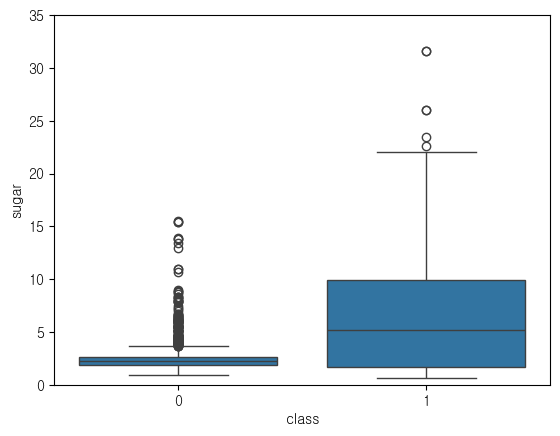

In [183]:
sns.boxplot(df_wine, x = "class", y = "sugar")
plt.ylim(0, 35)
plt.show()

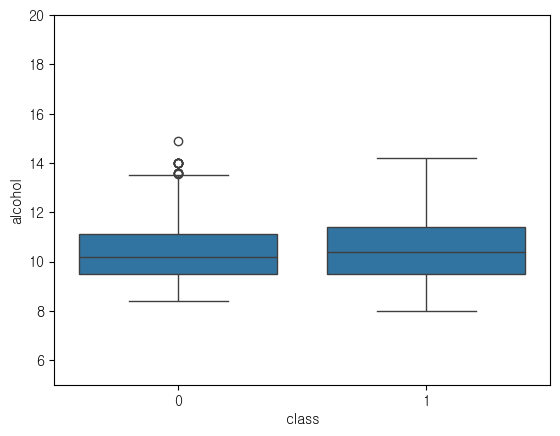

In [184]:
sns.boxplot(df_wine, x = "class", y = "alcohol")
plt.ylim(5, 20)
plt.show()

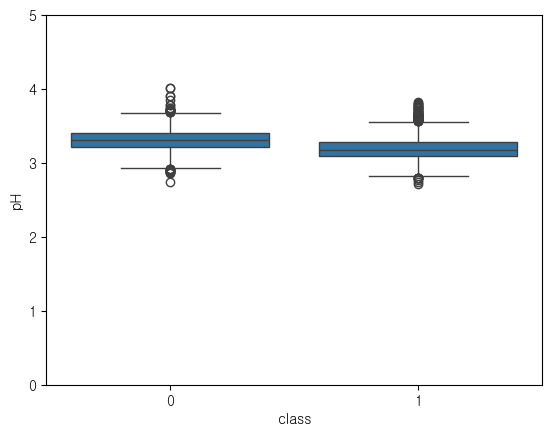

In [185]:
sns.boxplot(df_wine, x = "class", y = "pH")
plt.ylim(0, 5)
plt.show()

In [186]:
X = df_wine.iloc[:, :-1]
y = df_wine.iloc[:, -1]

In [187]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.3
)

In [188]:
## Scaling
standScaler = StandardScaler()
standScaler.fit(train_X)

train_scaled = standScaler.transform(train_X)
test_scaled = standScaler.transform(test_X)

In [189]:
from sklearn.tree import DecisionTreeClassifier

In [190]:
dt = DecisionTreeClassifier(criterion = "gini", max_depth=5, max_leaf_nodes = 10)
dt.fit(train_scaled, train_y)

print("Train acc = {:.4f}".format(dt.score(train_scaled, train_y)))
print("Test acc = {:.4f}".format(dt.score(test_scaled, test_y)))

Train acc = 0.8608
Test acc = 0.8672


In [191]:
from scipy import stats

# Z-score를 이용한 이상치 제거 함수 정의
def remove_outliers_zscore(df, threshold=3):
    # 숫자형 컬럼만 선택
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # 각 숫자형 컬럼에 대해 Z-score 기반으로 이상치 제거
    for col in num_cols:
        z_scores = stats.zscore(df[col])
        df = df[(z_scores < threshold)]
    
    return df

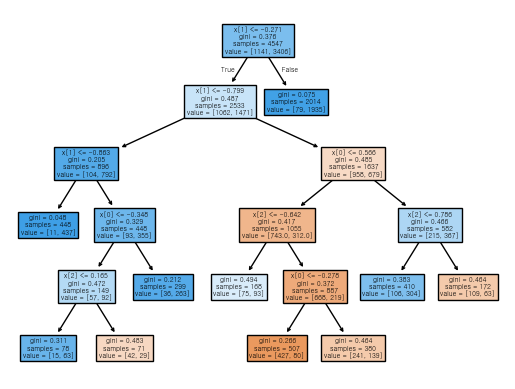

In [192]:
from sklearn.tree import plot_tree

plot_tree(dt, filled=True)
plt.show()

### 이상치 제거후 재시도

In [193]:
# 이상치 제거
df_wine_clean = remove_outliers_zscore(df_wine)
print(df_wine_clean.head())
print(df_wine_clean.shape)

   alcohol  sugar    pH class
0      9.4    1.9  3.51     0
1      9.8    2.6  3.20     0
2      9.8    2.3  3.26     0
3      9.8    1.9  3.16     0
4      9.4    1.9  3.51     0
(6437, 4)


In [194]:
X = df_wine_clean.iloc[:, :-1]
y = df_wine_clean.iloc[:, -1]

In [195]:
train_X_clean, test_X_clean, train_y_clean, test_y_clean = train_test_split(
    X, y, test_size = 0.3
)

In [196]:
## Scaling
standScaler = StandardScaler()
standScaler.fit(train_X_clean)

train_scaled_clean = standScaler.transform(train_X_clean)
test_scaled_clean = standScaler.transform(test_X_clean)

In [197]:
dt = DecisionTreeClassifier(criterion = "gini", max_depth=5, max_leaf_nodes = 10)
dt.fit(train_scaled, train_y)

print("Clean Train acc = {:.4f}".format(dt.score(train_scaled_clean, train_y_clean)))
print("Clean Test acc = {:.4f}".format(dt.score(test_scaled_clean, test_y_clean)))

Clean Train acc = 0.8650
Clean Test acc = 0.8520


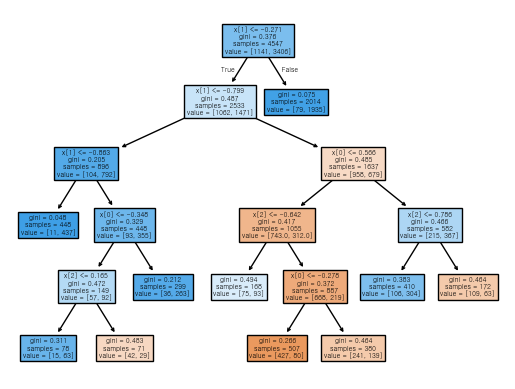

In [198]:
plot_tree(dt, filled=True)
# plot_tree(dt, max_depth=3, filled=True)
plt.show()

In [199]:
print(dt.feature_importances_)

pd.DataFrame(dt.feature_importances_, index = train_X_clean.columns)
# 변수간의 중요도 확인, 어떤 변수가 중요한 역할을 하는지

[0.14886288 0.75851903 0.09261809]


,0
alcohol,0.148863
sugar,0.758519
pH,0.092618


# 교차검증

In [208]:
## 교차검증 (Cross validation, cv)
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV

In [201]:
X = df_wine_clean.iloc[:, :-1]
y = df_wine_clean.iloc[:, -1]

In [202]:
train_scaled_cv = ss.fit_transform(X)

In [203]:
print(y.value_counts())
## 데이터 불균형

class
1    4855
0    1582
Name: count, dtype: int64


In [204]:
## 데이터 불균형 처리
splitter = StratifiedKFold(n_splits = 5, shuffle = True)

In [205]:
cv_result = cross_validate(dt, train_scaled_cv, y, cv = splitter)

In [206]:
cv_result["test_score"].mean()

np.float64(0.8634459743155395)

# GridSearch

In [230]:
## GridSearch
## maximum depth를 몇으로 하는게 좋은지 확인

dt = DecisionTreeClassifier()

params = {
    "min_impurity_decrease" : np.arange(0.001, 0.01, 0.0001)
    , "max_depth": [x for x in range(1, 101)]
    , "min_samples_split" : np.arange(2, 100, 10)
}
splitter = StratifiedKFold(n_splits = 5, shuffle = True)

grid_cv = GridSearchCV(dt
                       , param_grid = params
                       , cv = splitter)

grid_cv.fit(train_scaled_cv, y)
# print(grid_cv.cv_results_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_impurity_decrease': array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0....
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099]),
                         'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])})

In [231]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_impurity_decrease', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [232]:
print(grid_cv.best_params_)

{'max_depth': 8, 'min_impurity_decrease': np.float64(0.0011), 'min_samples_split': np.int64(2)}


# Random Forest

In [235]:
## Random Forest
## RF는 DT가 여러개 모인것이기 때문에 몇개의 트리를 더 만들지만 setting하면 됨
from sklearn.ensemble import RandomForestClassifier


In [236]:
rf = RandomForestClassifier(n_estimators=100)

In [242]:
params = {
    "n_estimators": np.arange(2, 200, 10)
    , "max_depth": [x for x in range(1, 101)]
}

splitter = StratifiedKFold(n_splits = 5, shuffle = True)
grid_rf = GridSearchCV(rf
                       , param_grid = params
                       , cv = splitter)
grid_rf.fit(train_scaled_cv, y)

KeyboardInterrupt: 

In [241]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_["mean_test_score"])
print(grid_rf.best_score_)

{'max_depth': 15, 'n_estimators': 100}
[0.82911388 0.83035648 0.83206311 0.83159763 0.86018028 0.86002681
 0.86189113 0.85924957 0.86593021 0.86950308 0.86655229 0.86748397
 0.87866855 0.87556091 0.87618275 0.87991079 0.89140763 0.89171662
 0.89171686 0.89140606 0.89637838 0.8973103  0.8980867  0.89731054]


In [ ]:
rf_best = RandomForestClassifier(n_estimators = 120
                                 , max_depth = 15)
rf_best.fit(train_scaled_cv, y)

In [ ]:
print(rf_best.feature_importances_)
print(rf_best.score(train_scaled_cv, y))

# Gradient Boosting

In [356]:
## Gradient Boosting
## 에러값을 찾는 알고리즘(RF 업그레이드 버전?)
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

gb = GradientBoostingClassifier()

params = {
    "n_estimators": np.arange(2, 200, 10)
    , "max_depth": [x for x in range(1, 101)]
    , "learning_rate": np.arange(0.1, 1, 0.1)
}

splitter = StratifiedKFold(n_splits = 5, shuffle = True)


In [ ]:
cv_result = cross_validate(gb, train_scaled_cv, y, cv = splitter)
print(np.mean(cv_result["test_score"]))

In [ ]:
grid_gb = GridSearchCV(gb
                       , param_grid = params
                       , cv = splitter)
grid_gb.fit(train_scaled_cv, y)

In [ ]:
print(grid_gb.best_params_)
print(grid_gb.cv_results_["mean_test_score"])
print(grid_gb.best_score_)

In [ ]:
gb_best = RandomForestClassifier(n_estimators = 120
                                 , max_depth = 15)
gb_best.fit(train_scaled_cv, y)

# quest : DT, RF, GB 사용해서 survived 예측

In [341]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [342]:
df_titanic = df_titanic.iloc[:, :7]
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


====== DataFrame Shape ======
Shape: (891, 6)

====== DataFrame Columns ======
Columns: ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare']

====== DataFrame Info ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB

====== DataFrame Description ======


,survived,pclass,sex,sibsp,parch,fare
count,891.000000,891.000000,891,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,0.523008,0.381594,32.204208
std,0.486592,0.836071,NaN,1.102743,0.806057,49.693429
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000



====== Unique Values per Column ======


survived      2
pclass        3
sex           2
sibsp         7
parch         7
fare        248
dtype: int64


====== DataFrame Head (First 5 rows) ======


,survived,pclass,sex,sibsp,parch,fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500



====== DataFrame Missing Values ======


Series([], dtype: int64)


====== DataFrame Duplicates ======
Number of duplicate rows: 403

====== Boxplots for Outlier Detection ======


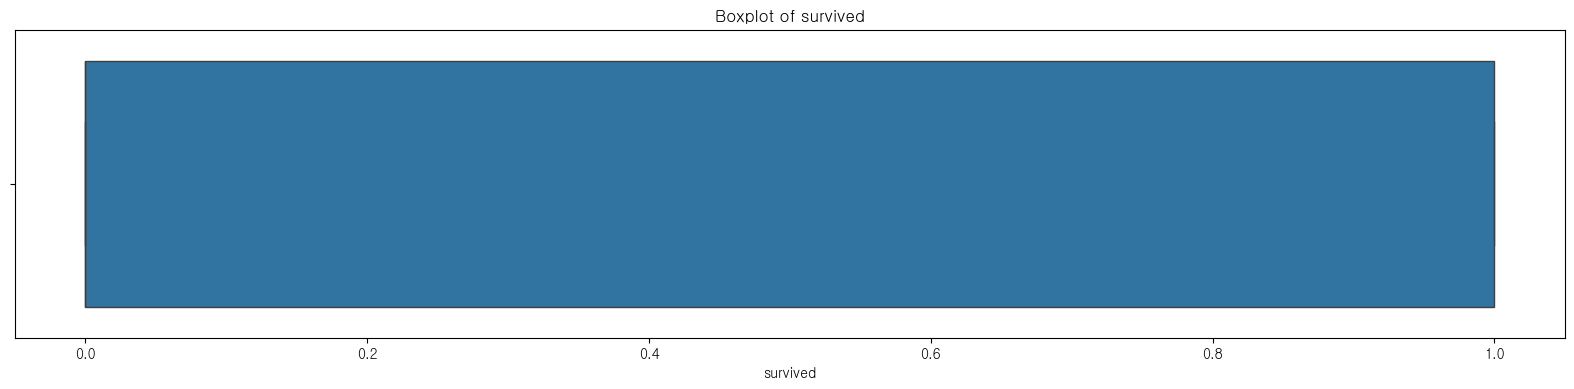

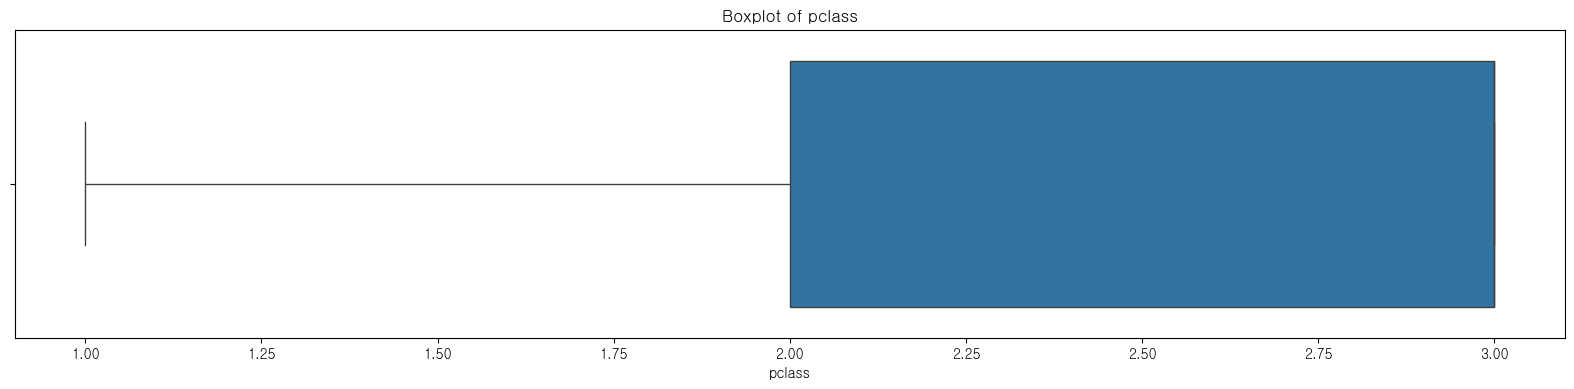

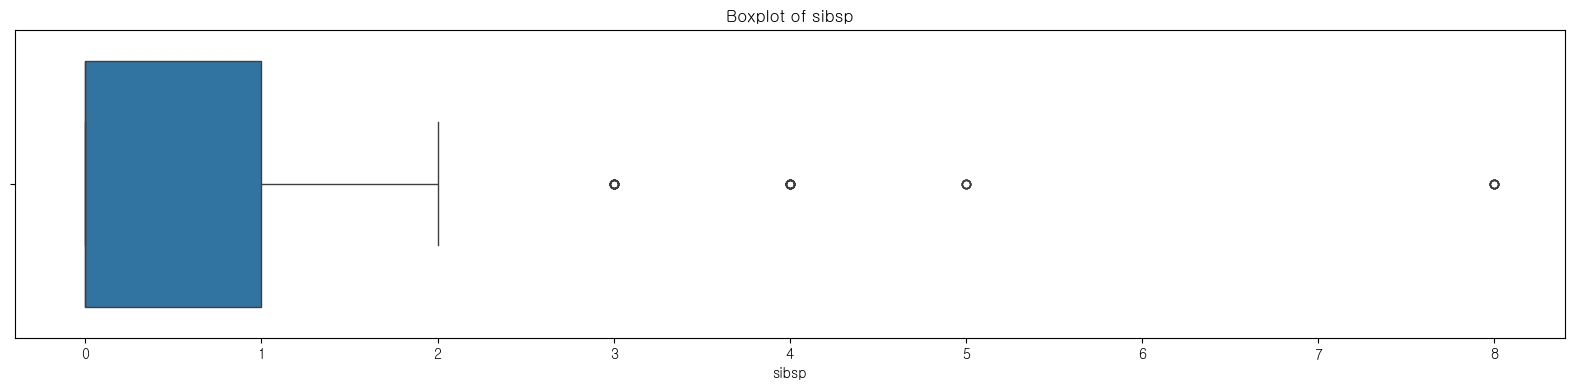

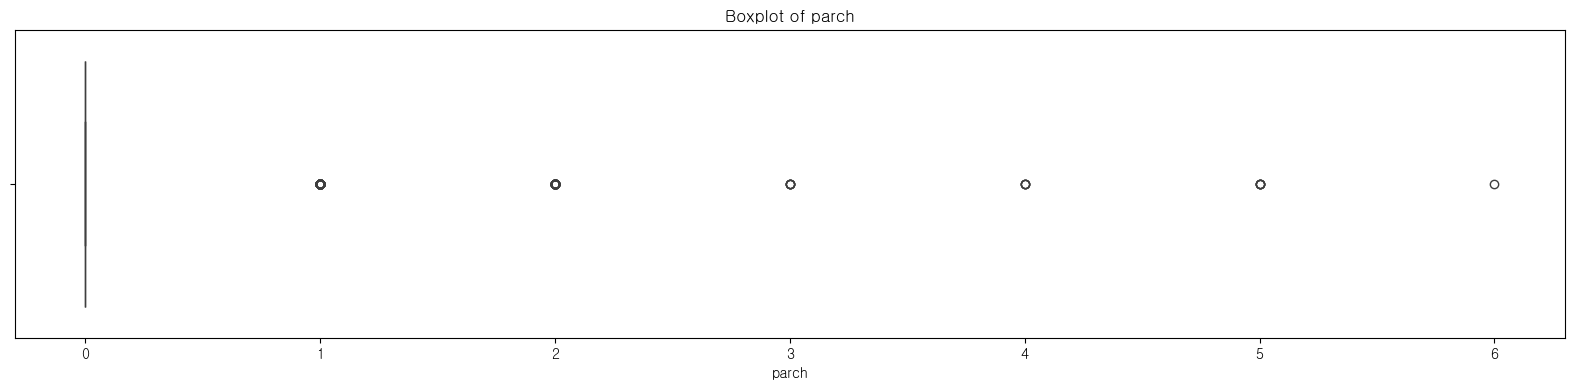

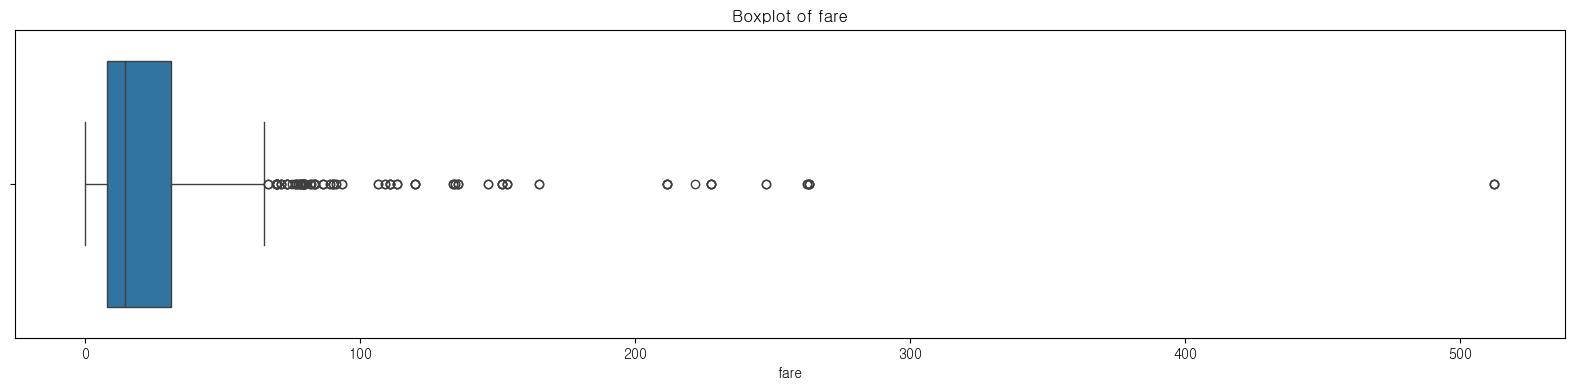

In [304]:
summarize_dataframe(df_titanic)

In [343]:
# sex column 변환
df_titanic = pd.get_dummies(df_titanic, columns= ["sex"], drop_first=True)

In [344]:
df_titanic

,survived,pclass,age,sibsp,parch,fare,sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
888,0,3,NaN,1,2,23.4500,False
889,1,1,26.0,0,0,30.0000,True


## 이상치, 결측치 제거

In [281]:
def remove_outliers(df, column):
    """
    특정 컬럼에 대해 IQR을 사용하여 이상치를 제거하는 함수.
    
    Parameters:
    df (pd.DataFrame): 이상치를 제거하려는 데이터프레임
    column (str): 이상치를 제거하려는 수치형 컬럼
    
    Returns:
    pd.DataFrame: 이상치가 제거된 데이터프레임
    """
    Q1 = df[column].quantile(0.25)  # 1사분위수
    Q3 = df[column].quantile(0.75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    
    # IQR에 따른 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 제거한 데이터프레임 반환
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

In [282]:
# 수치형 컬럼만 자동으로 처리
numeric_columns = df_titanic.select_dtypes(include='number').columns  # 수치형 컬럼 선택
for column_name in numeric_columns:
    df_titanic_cleaned = remove_outliers(df_titanic, column_name)

In [283]:
df_titanic_cleaned.dropna()

,survived,pclass,age,sibsp,parch,fare,sex_male
0,0,3,22.0,1,0,7.2500,True
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
6,0,1,54.0,0,0,51.8625,True
...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False
886,0,2,27.0,0,0,13.0000,True
887,1,1,19.0,0,0,30.0000,False
889,1,1,26.0,0,0,30.0000,True


====== DataFrame Shape ======
Shape: (775, 7)

====== DataFrame Columns ======
Columns: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

====== DataFrame Info ======
<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  775 non-null    int64  
 1   pclass    775 non-null    int64  
 2   age       613 non-null    float64
 3   sibsp     775 non-null    int64  
 4   parch     775 non-null    int64  
 5   fare      775 non-null    float64
 6   sex_male  775 non-null    bool   
dtypes: bool(1), float64(2), int64(4)
memory usage: 43.1 KB

====== DataFrame Description ======


,survived,pclass,age,sibsp,parch,fare,sex_male
count,775.000000,775.00000,613.000000,775.000000,775.000000,775.000000,775
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,531
mean,0.339355,2.48000,28.946574,0.437419,0.340645,17.822091,NaN
std,0.473796,0.73439,14.368139,0.899838,0.785914,13.578085,NaN
min,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.00000,20.000000,0.000000,0.000000,7.895800,NaN
50%,0.000000,3.00000,28.000000,0.000000,0.000000,13.000000,NaN
75%,1.000000,3.00000,37.000000,1.000000,0.000000,26.000000,NaN



====== Unique Values per Column ======


survived      2
pclass        3
age          87
sibsp         6
parch         7
fare        203
sex_male      2
dtype: int64


====== DataFrame Head (First 5 rows) ======


,survived,pclass,age,sibsp,parch,fare,sex_male
0,0,3,22.0,1,0,7.2500,True
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True
5,0,3,NaN,0,0,8.4583,True



====== DataFrame Missing Values ======


age    162
dtype: int64


====== DataFrame Duplicates ======
Number of duplicate rows: 108

====== Boxplots for Outlier Detection ======


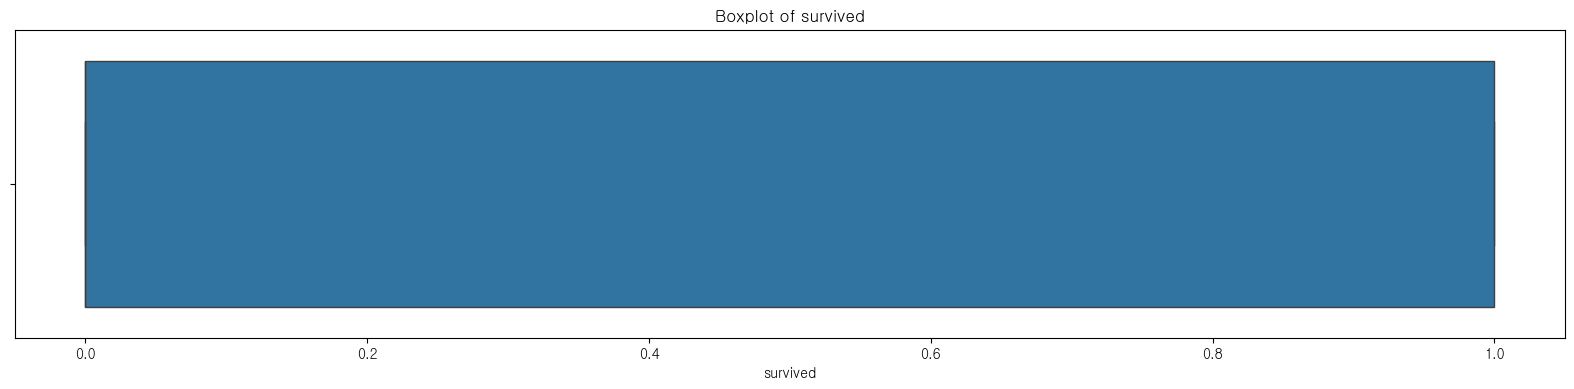

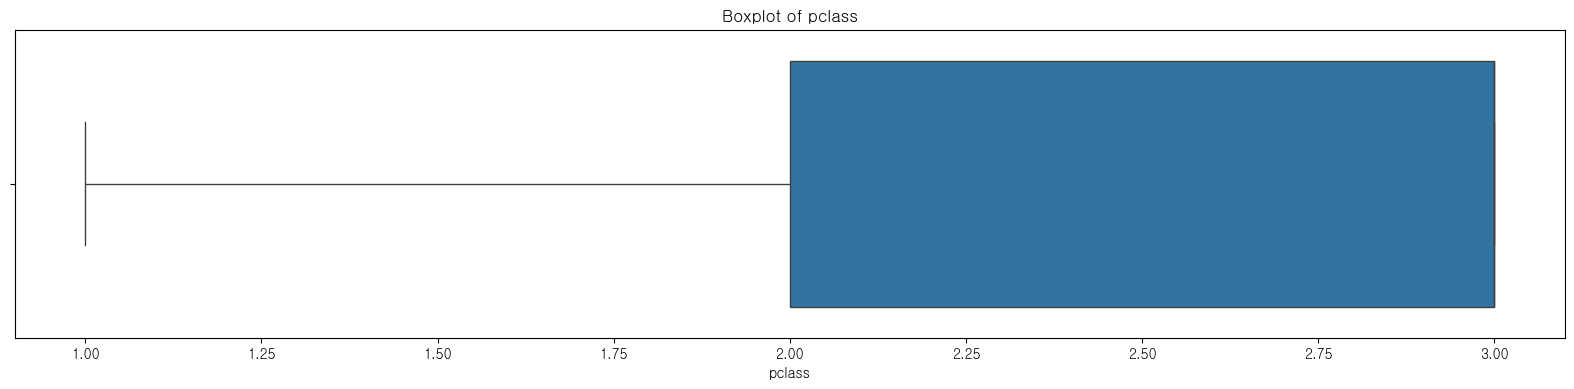

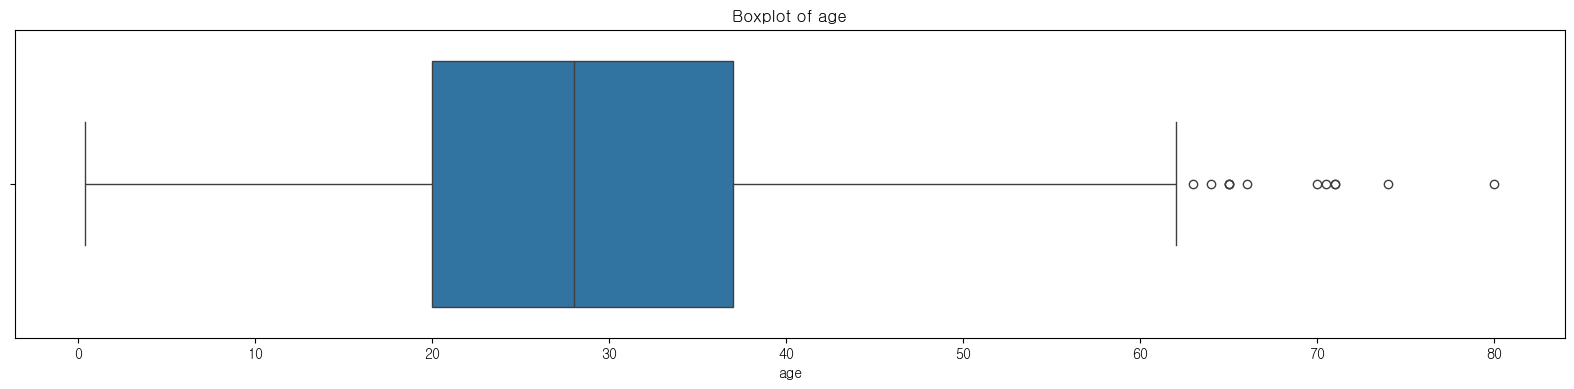

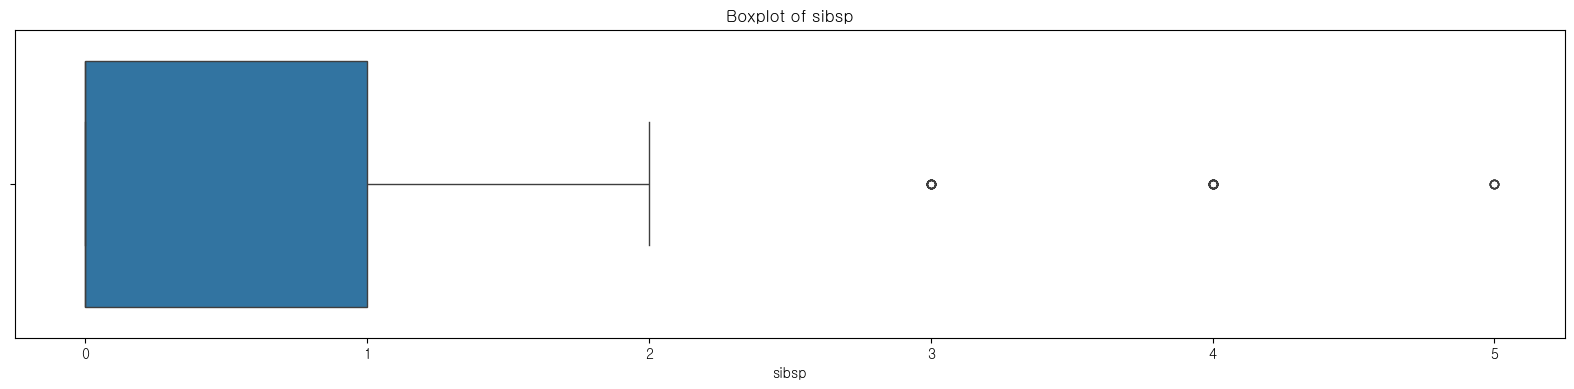

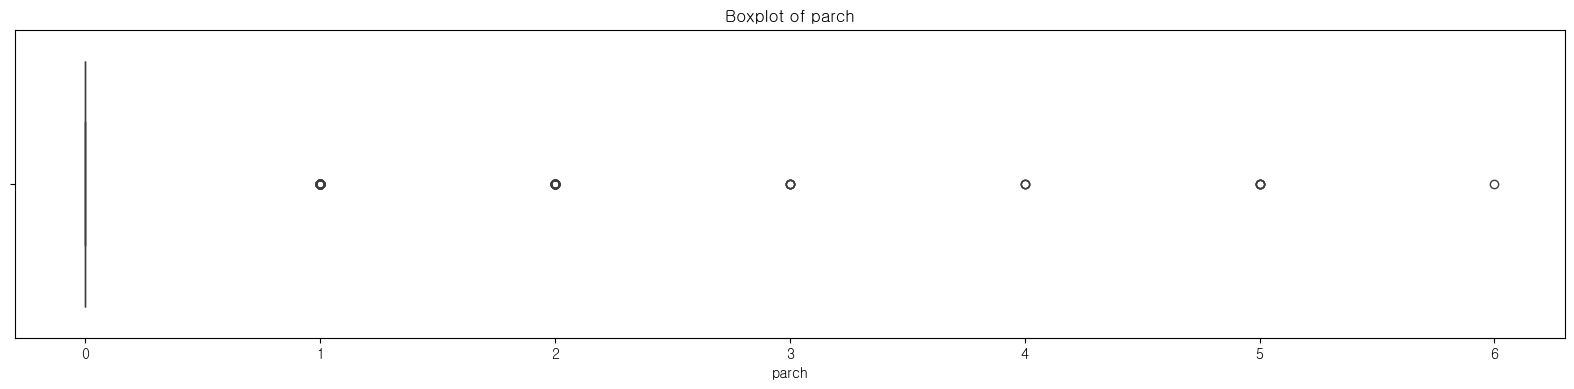

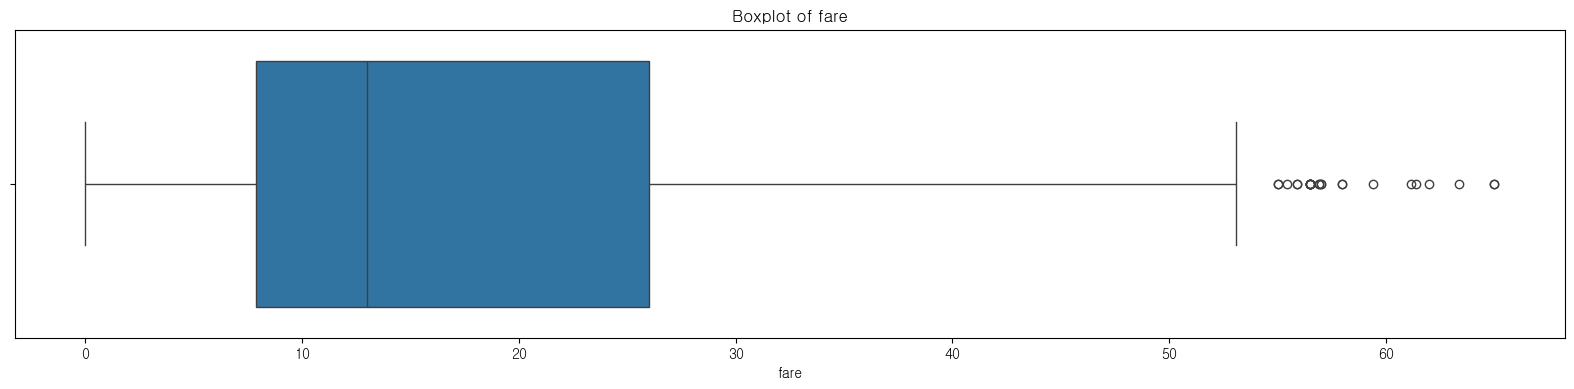

In [298]:
summarize_dataframe(df_titanic_cleaned)

In [345]:
df_titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male
0,0,3,22.0,1,0,7.2500,True
1,1,1,38.0,1,0,71.2833,False
2,1,3,26.0,0,0,7.9250,False
3,1,1,35.0,1,0,53.1000,False
4,0,3,35.0,0,0,8.0500,True


In [346]:
df_titanic.dropna(subset=["age"], axis = 0, inplace = True)

In [347]:
df_titanic.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
sex_male    0
dtype: int64

In [349]:
X = df_titanic.drop(columns="survived")
y = df_titanic["survived"]

In [352]:
# # split 할 필요없음 why? KFold교차검증
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [348]:
## Tree 정규화 필요없음

# standScaler = StandardScaler()
# standScaler.fit(X_train)

# train_scaled = standScaler.transform(X_train)
# test_scaled = standScaler.transform(X_test)

## 모델 1) DT

In [350]:
dt = DecisionTreeClassifier()

params = {
    "max_depth": range(3, 20, 1)
    , "max_leaf_nodes": range(3, 20, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)

gs_dt = GridSearchCV(dt, param_grid=params, cv= splitter)
gs_dt.fit(X, y)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(3, 20),
                         'max_leaf_nodes': range(3, 20)})

In [351]:
print("Best parameters = ", gs_dt.best_estimator_)
print("cv_score = {:4f}".format(gs_dt.best_score_))

Best parameters =  DecisionTreeClassifier(max_depth=10, max_leaf_nodes=19)
cv_score = 0.824978


## 모델2) RF

In [353]:
rf = RandomForestClassifier()

params = {
    "n_estimators": range(90, 120, 1)
    , "max_depth" : range(3, 15, 1)
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid=params, cv = splitter)
grid_rf.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(3, 15),
                         'n_estimators': range(90, 120)})

In [354]:
print("Best parameters = ", grid_rf.best_estimator_)
print("cv score = {:4f}".format(grid_rf.best_score_))

Best parameters =  RandomForestClassifier(max_depth=8, n_estimators=92)
cv score = 0.831882


## 모델3) GB

In [357]:
gb = GradientBoostingClassifier()

params = {
    "n_estimators": range(90, 120, 1)
    , "max_depth": range(3, 15, 1)
    , "learning_rate": np.arange(0.1, 1, 0.1)
}

splitter = StratifiedKFold(n_splits = 5, shuffle = True)
grid_gb = GridSearchCV(gb, param_grid=params, cv = splitter)
grid_gb.fit(X, y)

In [ ]:
print("Best parameters = ", grid_rf.best_estimator_)
print("cv score = {:4f}".format(grid_rf.best_score_))